# How to plot results

Pyleecan has generic built-in plot methods which allow to easily plot:

- **simulated** or **experimental** fields (unit conversions supported)

- **slices** (normalizations available)

- **Fourier Transforms**

but also to **compare** on the same graph a list of fields.

This flexibility is provided by the [SciDataTool module](https://github.com/Eomys/SciDataTool), which has been created to **ease the handling of scientific data**, and considerately simplify plot commands. It unifies the extraction of relevant data (e.g. slices), whether they are stored in the time/space or in the frequency domain. The call to Fourier Transform functions is **transparent**, although it still can be parameterized.

This tutorial explains how to use Pyleecan's **plot commands**. It is available on [GitHub](https://github.com/Eomys/pyleecan/tree/master/Tutorials/tuto_Plots.ipynb). For more details on the `SciDataTool` package, please refer to the specific tutorials:

- [How to create Data objects](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto1_Create.ipynb)

- [How to extract slices](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto2_Slices.ipynb)

- [How to compare several fields in one plot](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto3_Compare.ipynb)

- [How to perform advanced Fourier transforms](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto4_Fourier.ipynb)

The first step consists in getting simulation data. In order to demonstrate the capabilities of the plot commands, a simulation over 2048 time steps has been performed in the [simulation tutorial](https://pyleecan.org/tuto_Simulation_FEMM.html), and the resulting **Output** object has been stored on Pyleecan's website. First, these results need to be downloaded:

In [1]:
# Change of directory to have pyleecan in the path
from os import chdir
chdir('..')

# Import Pyleecan modules
from pyleecan.Functions.load import load
from json import load as jload

# Download simulation data
import urllib.request
print('Downloading the simulation data...')
url = 'https://www.pyleecan.org/Data/tuto_Simu_FEMM_results.json'
urllib.request.urlretrieve(url, 'tuto_Simu_FEMM_results.json')
print("Done")

# Load Output object from json file
print("Loading json file...")
out = load('tuto_Simu_FEMM_results.json')
print("Done")

Done
Loading json file...
Done


The following example demonstrates the syntax to **quickly plot** the airgap radial flux density obtained at the end of the simulation:

<IPython.core.display.Javascript object>


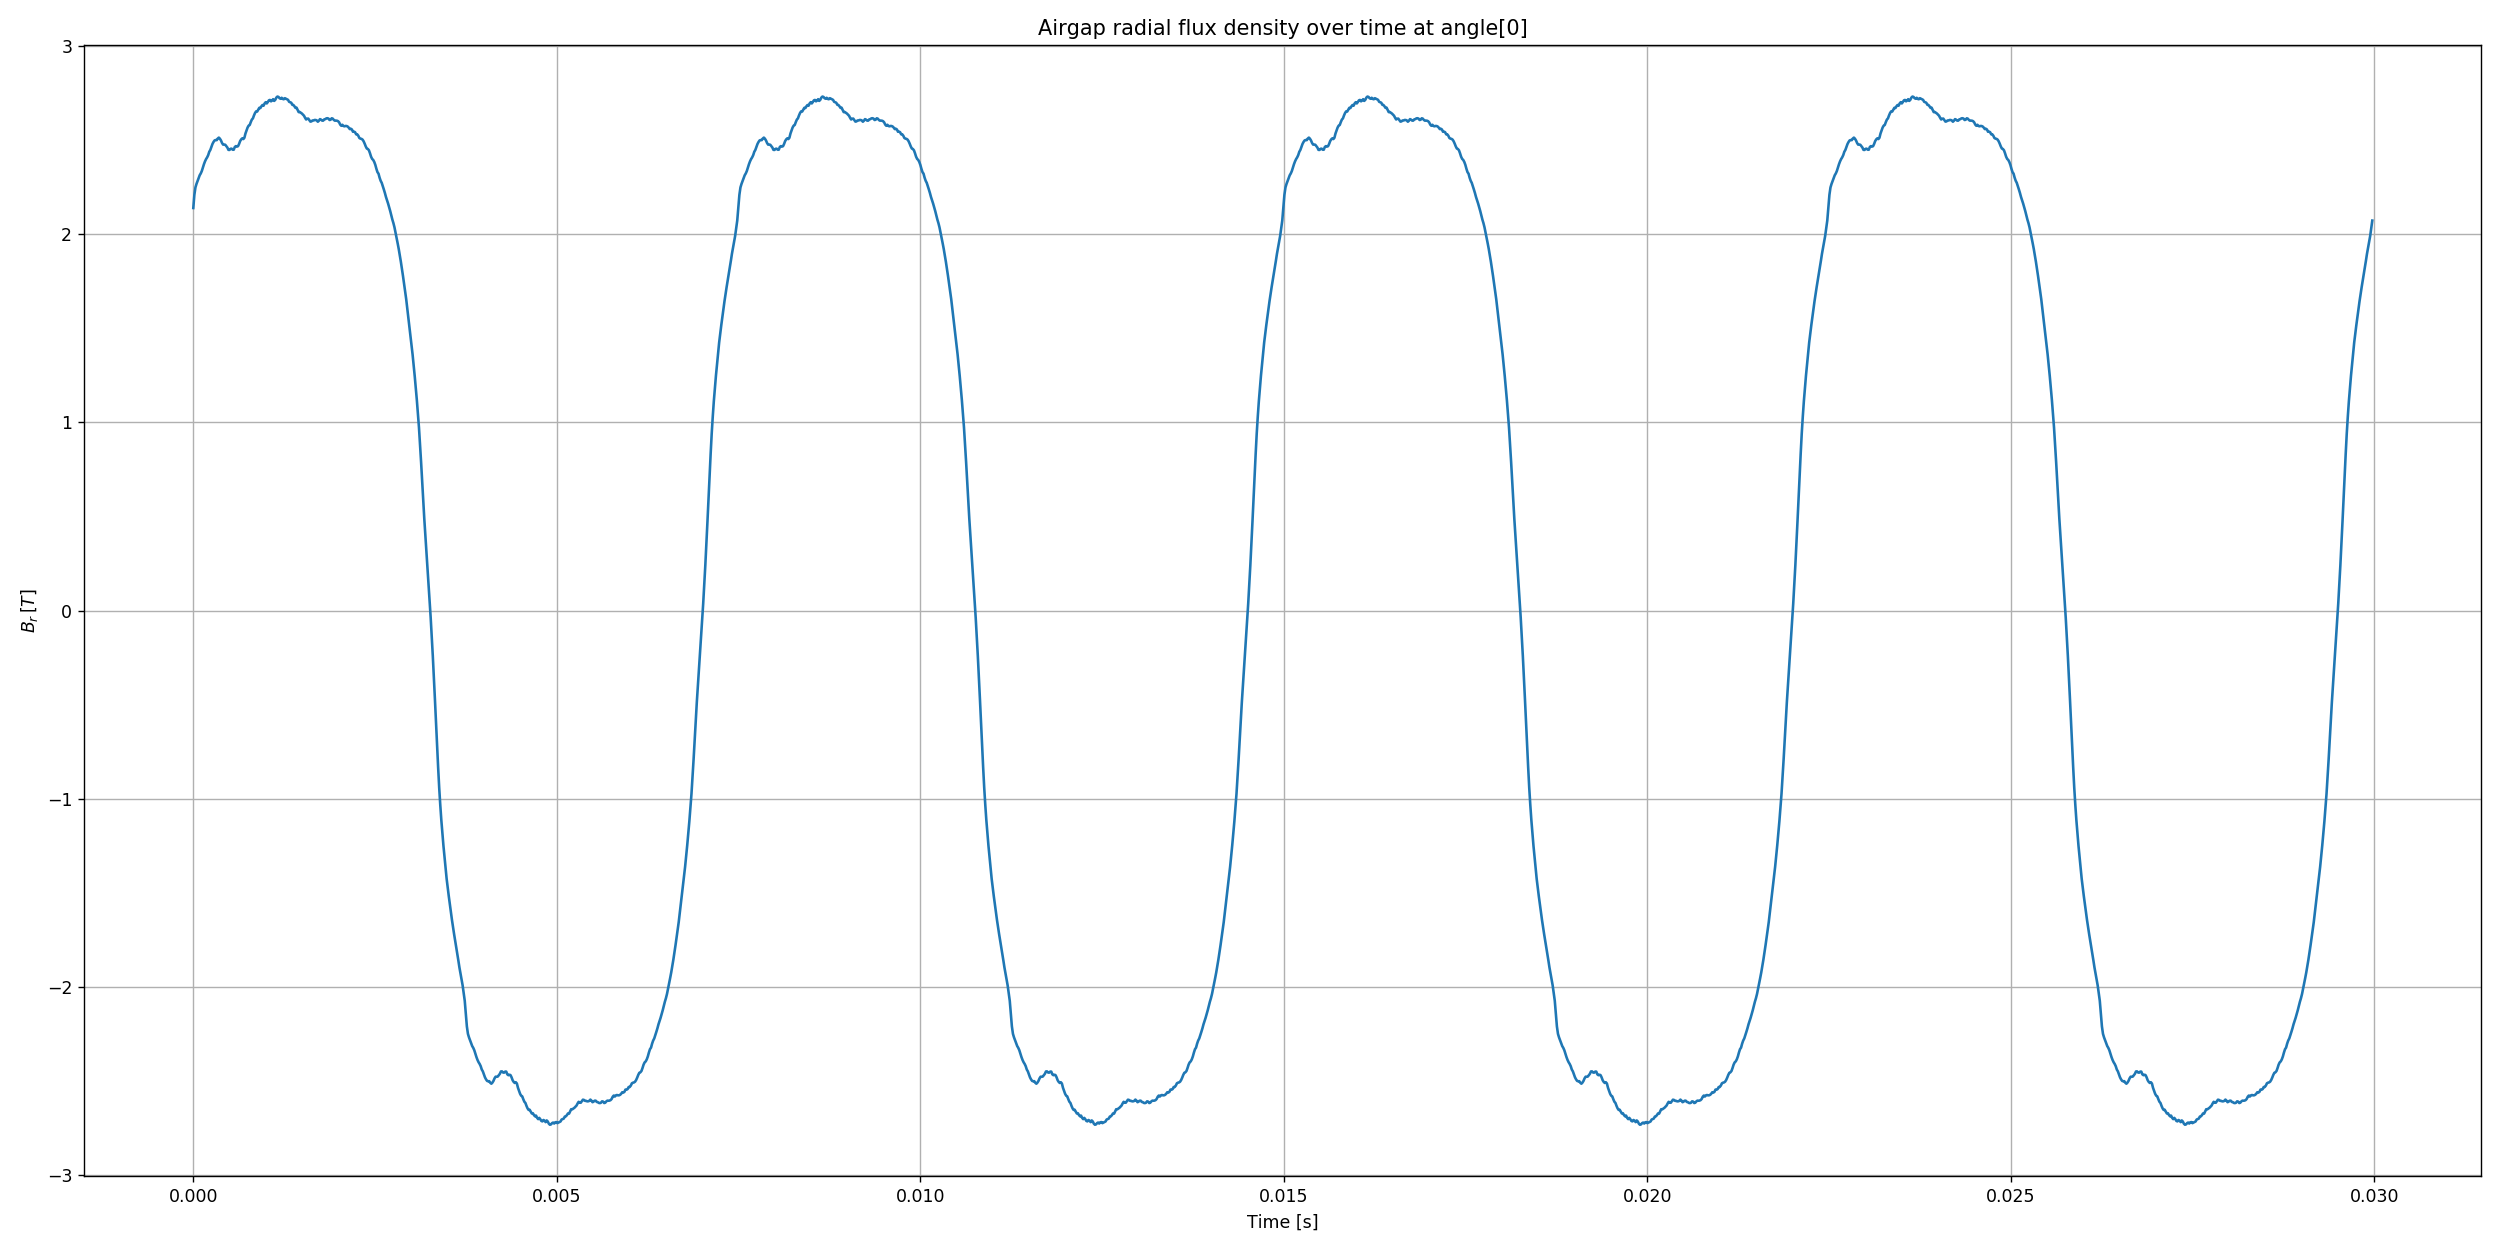

In [2]:
%matplotlib notebook

#------------------------------------------------------
# Plot the flux density as a function of space
out.plot_A_time("mag.Br")
#------------------------------------------------------

The plot command requires the **name** of the field (*"mag.Br"* for instance). Titles and legends are automatically generated. In this tutorial, only the airgap radial flux density is plotted, but the commands work with **any field computed in Pyleecan**.

There are, for the time being, 7 plot commands in Pyleecan:

- `plot_A_space`: field as a function of the angle
- `plot_A_time`: field as a function of time
- `plot_A_surf`: 3D surface in time/space domain
- `plot_A_time_space`: 3D surface + angle + time
- `plot_A_nthoct`: spectrum in the $1/n^{\text{th}}$ octave band
- `plot_A_cfft2`: 3D stem plot of the 2D Fourier Transform
- `plot_A_fft2`: pcolor plot of the 2D Fourier Transform

## `plot_A_space`

### Description

This plot command plots a field as a function of the angle, at a given time step (first time step by default, or value prescribed by the user). It can also add a subplot with the space Fourier Transform if the *is_fft* key is activated. 

### Parameters

|Parameter|Description|Type|Default Value|
| :-: | :- | :-: | :-: |
|*Data_str*|Name of the field|`str`|mandatory|
|*index_list*|List of indices to take from a components axis|`[int]`|`[0]`|
|*t*|Slice at *time=t*|`float`|`None`|
|*t_index*|Slice at *time[t_index]*|`int`|`0`|
|*is_deg*|Angle in degrees or radians|`bool`|`True`|
|*is_fft*|Add the fft as a subplot|`bool`|`False`|
|*is_spaceorder*|x-axis of the fft in space orders|`bool`|`False`|
|*r_max*|Maximum value for the wavenumbers to display|`int`|`100`|
|*fund_harm*|Frequency of the fundamental harmonic|`float`|`None`|
|*is_norm*|Normalize the field|`bool`|`False`|
|*unit*|Unit of the field|`str`|`"SI"`|
|*data_list*|List of **Data** objects to compare|`[Data]`|`[]`|
|*legend_list*|List of legends to use for each **Data** object (including reference one) instead of `Data.name`|`[str]`|`[]`|
|*color_list*|List of colors to use for each **Data** object|`[str]`|`["tab:blue","tab:red","tab:olive","k","tab:orange","tab:pink"]`|

### Example

<IPython.core.display.Javascript object>


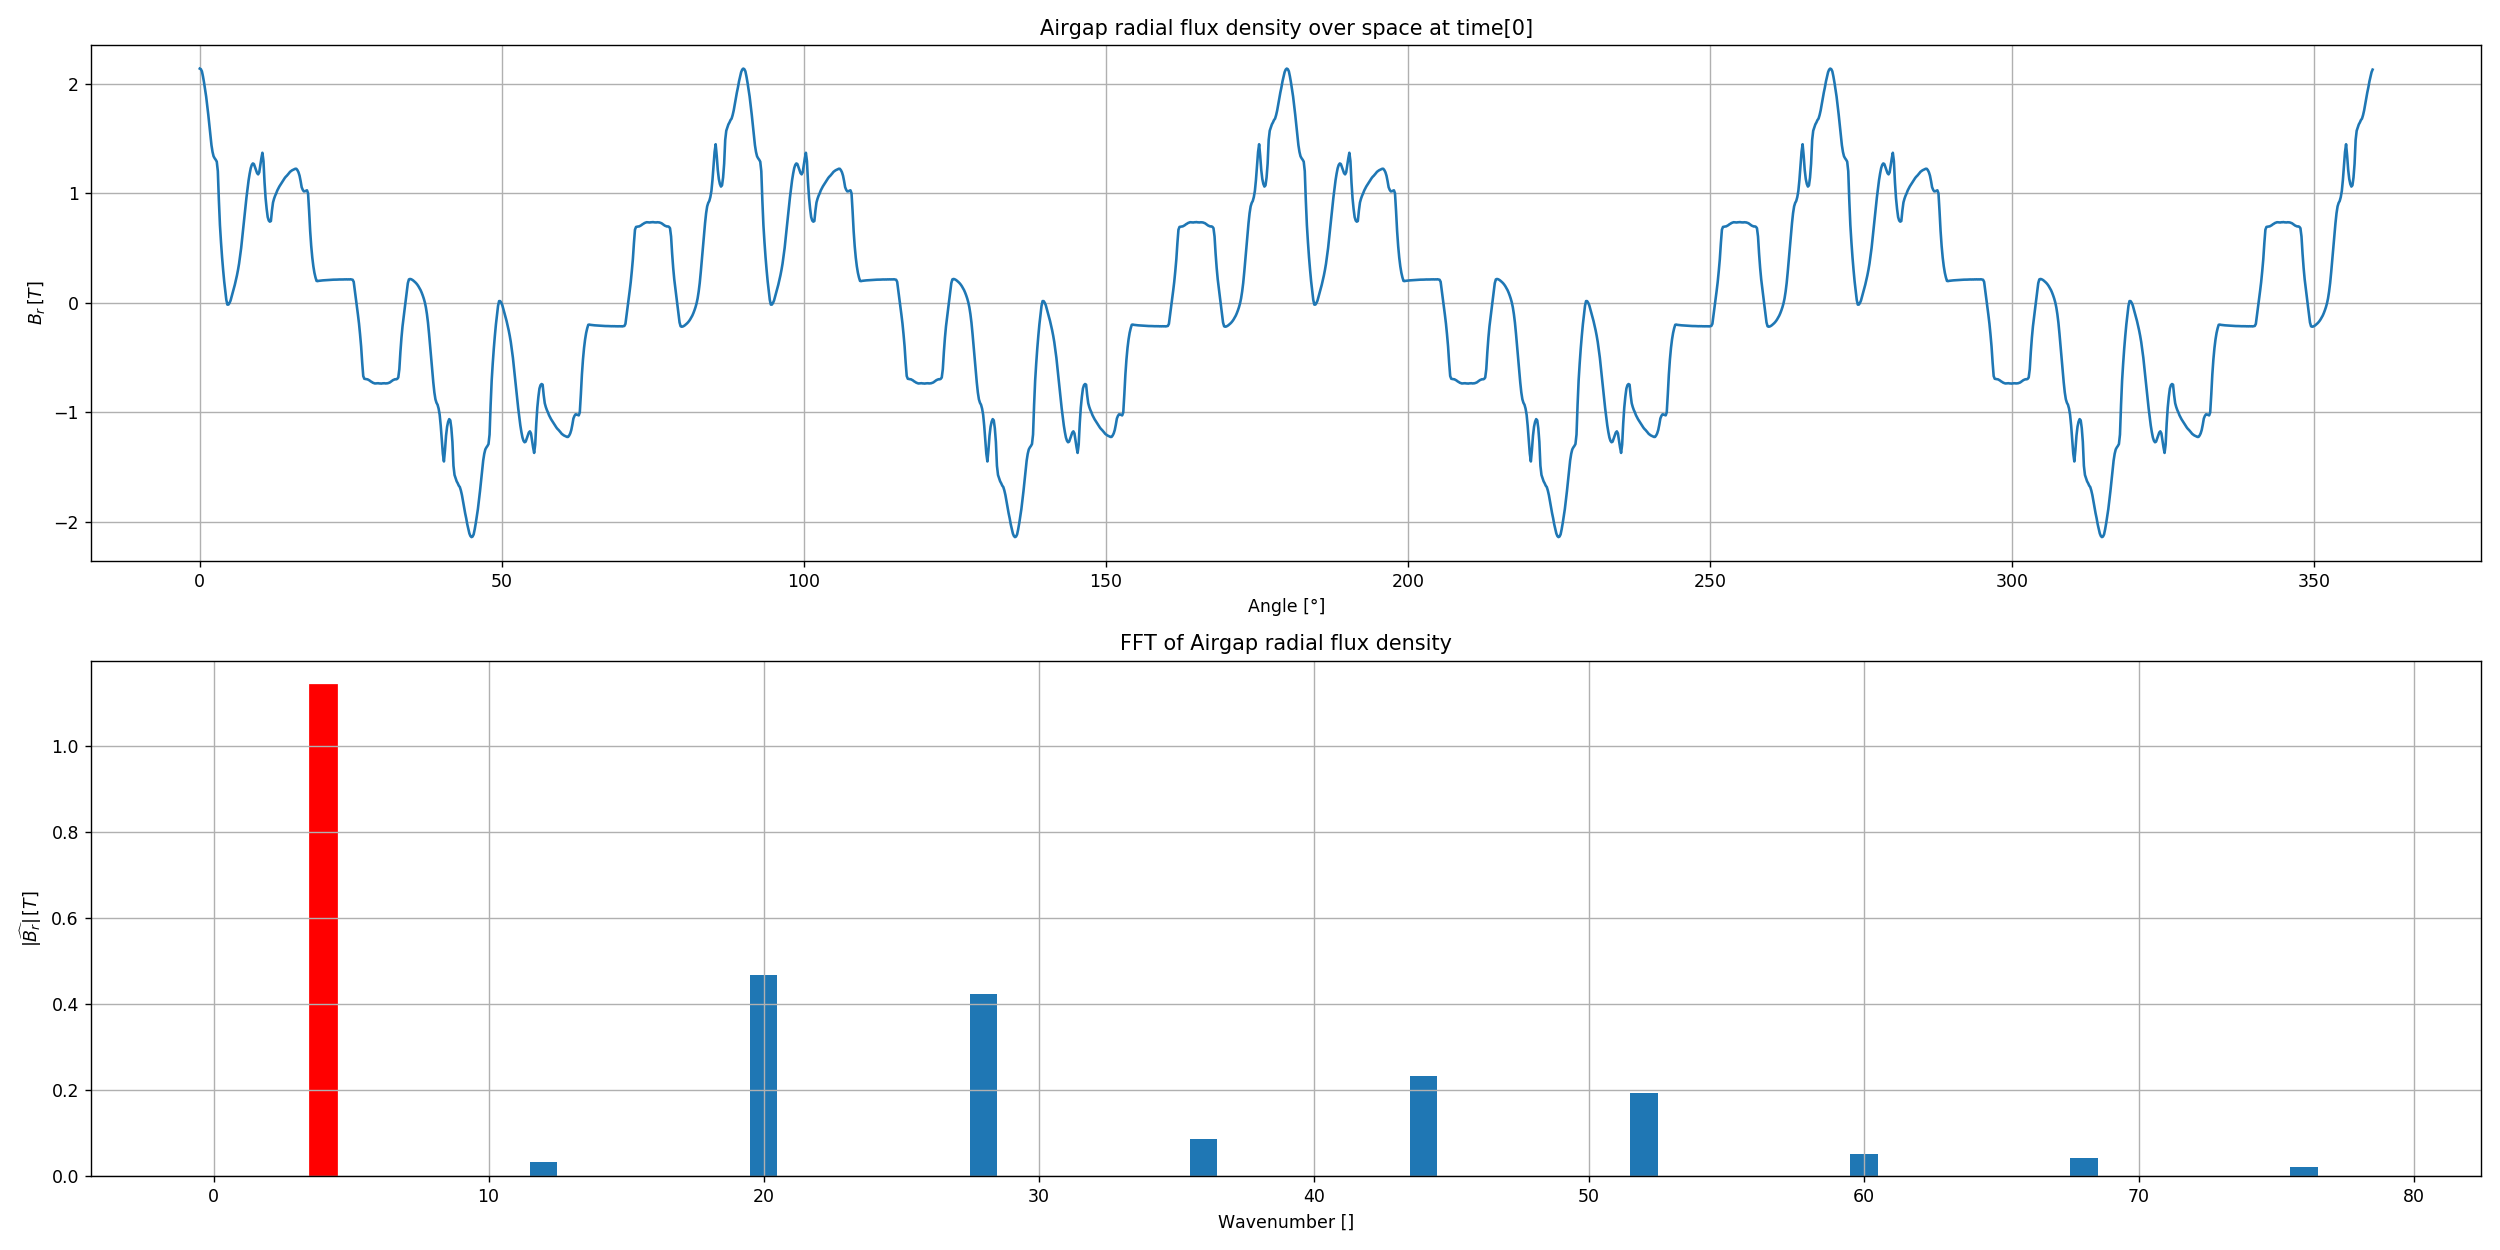

In [3]:
#------------------------------------------------------
# Plot the flux density as a function of space with the spatial fft
r_max = 78
out.plot_A_space("mag.Br", is_fft=True, r_max=r_max)
#------------------------------------------------------

## `plot_A_time`

### Description

This plot command plots a field as a function of time, at a given angle (first angle by default, or value prescribed by the user). It can also add a subplot with the Fourier Transform if the *is_fft* key is activated.

### Parameters

|Parameter|Description|Type|Default Value|
| :-: | :- | :-: | :-: |
|*Data_str*|Name of the field|`str`|mandatory|
|*index_list*|List of indices to take from a components axis|`[int]`|`[0]`|
|*alpha*|Slice at *angle=alpha*|`float`|`None`|
|*alpha_index*|Slice at *angle[alpha_index]*|`int`|`0`|
|*is_fft*|Add the fft as a subplot|`bool`|`False`|
|*is_elecorder*|x-axis of the fft in electrical orders|`bool`|`False`|
|*freq_max*|Maximum value for the frequencies to display|`float`|`20000`|
|*is_norm*|Normalize the field|`bool`|`False`|
|*unit*|Unit of the field|`str`|`"SI"`|
|*data_list*|List of **Data** objects to compare|`[Data]`|`[]`|
|*legend_list*|List of legends to use for each **Data** object (including reference one) instead of `Data.name`|`[str]`|`[]`|
|*color_list*|List of colors to use for each **Data** object|`[str]`|`["tab:blue","tab:red","tab:olive","k","tab:orange","tab:pink"]`|

### Example

<IPython.core.display.Javascript object>


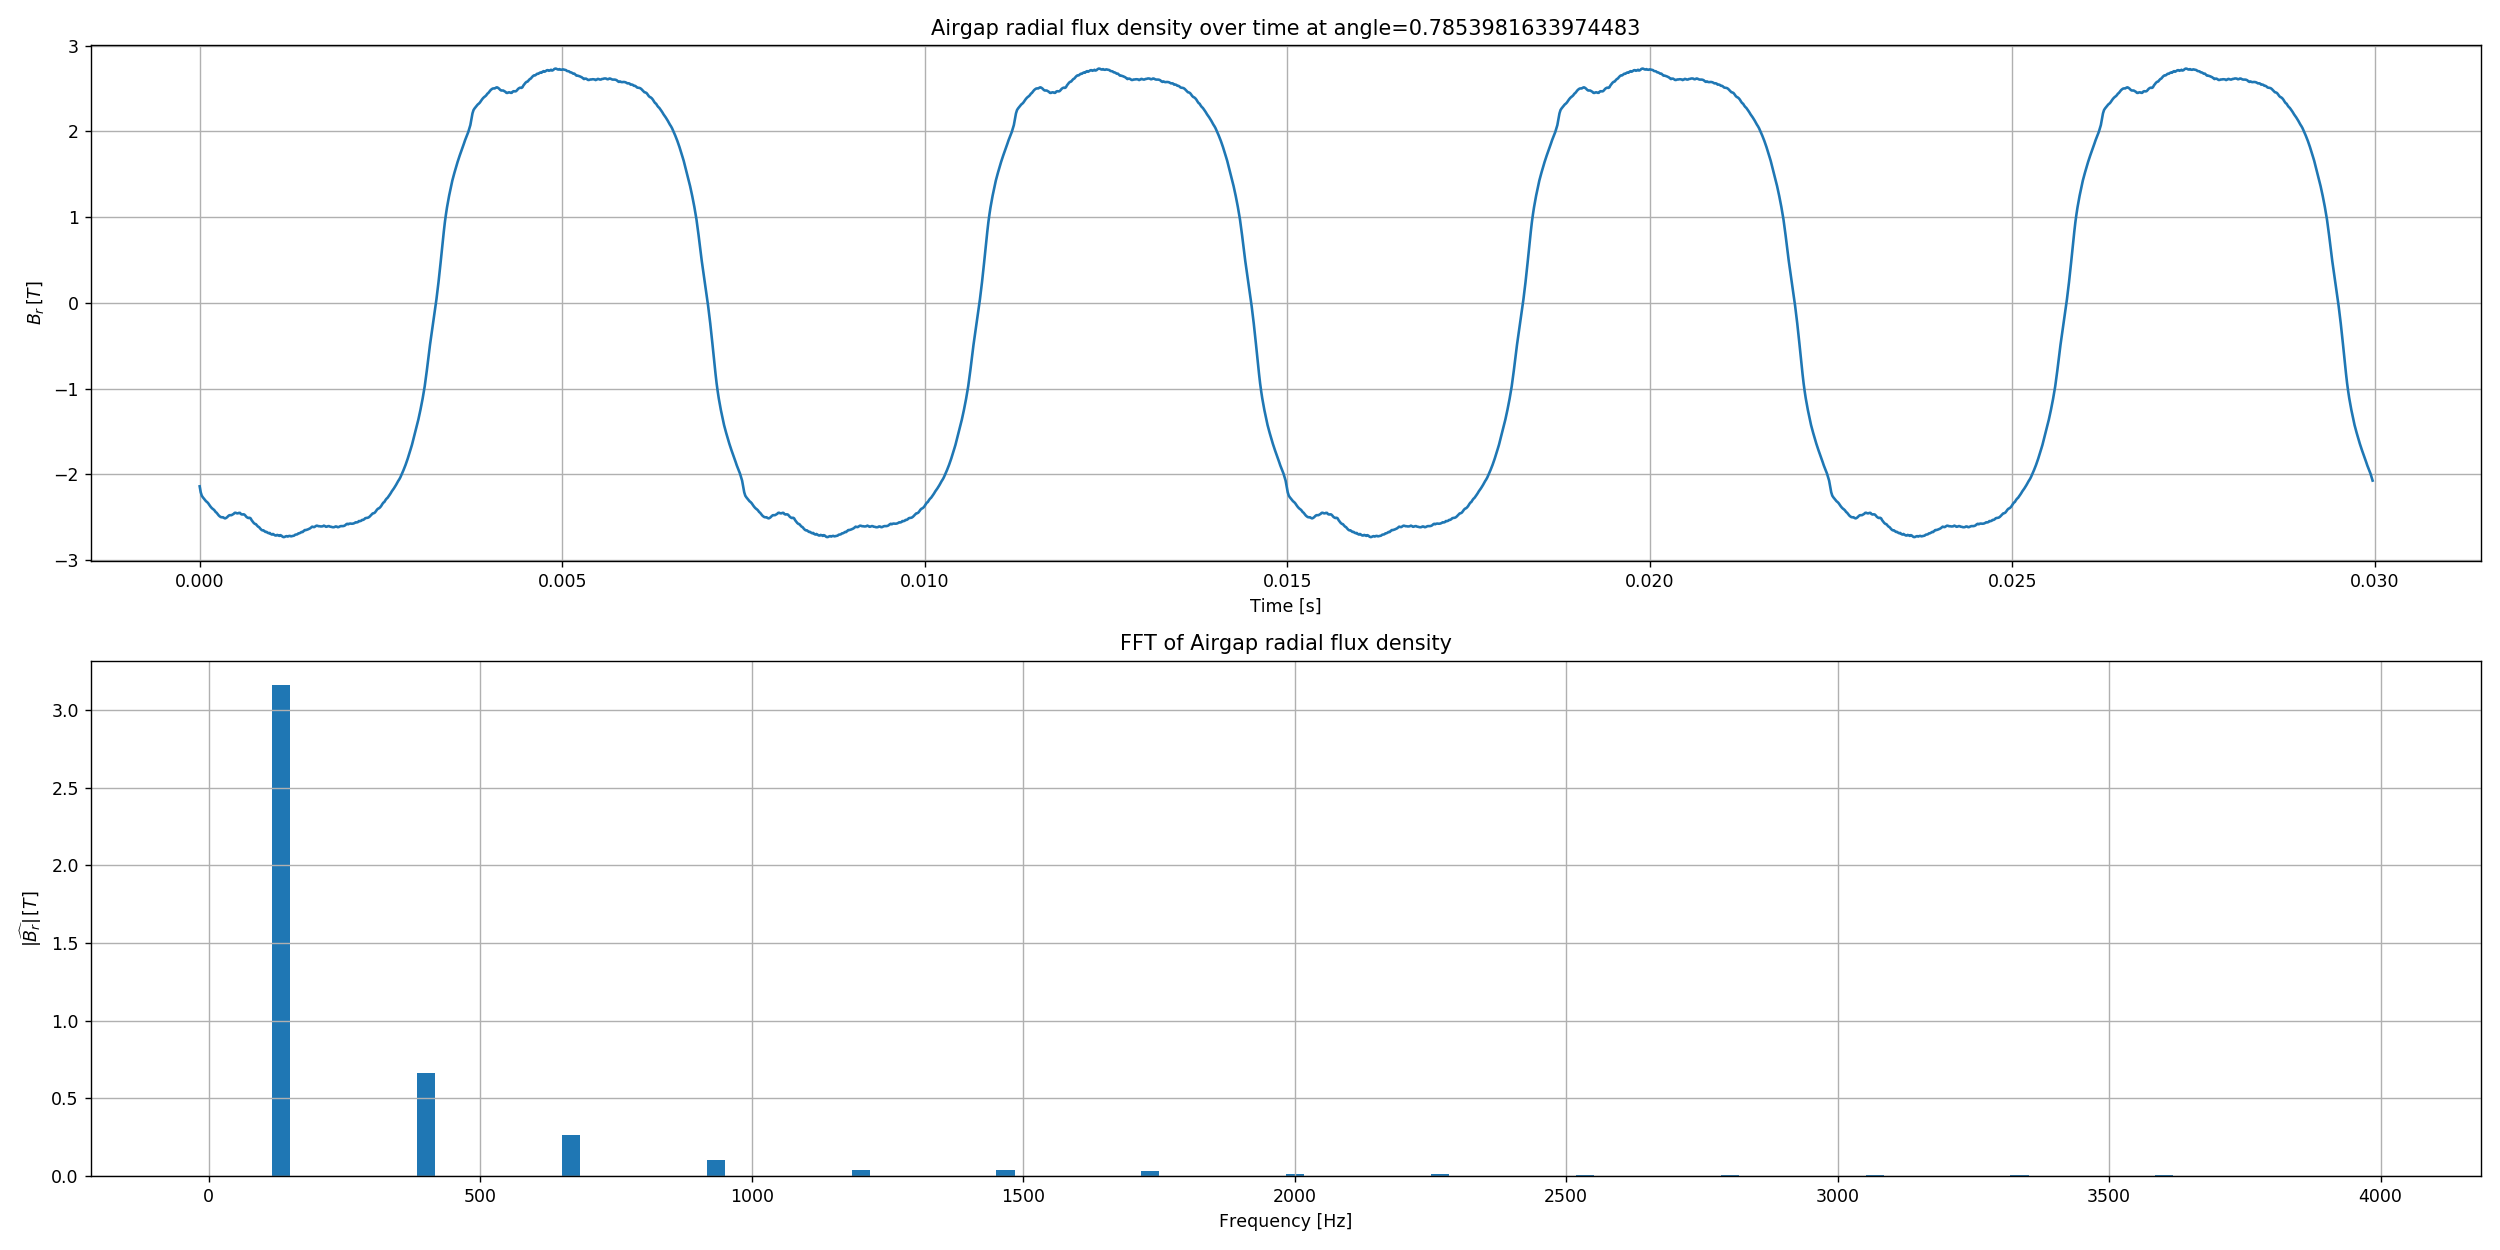

In [4]:
from numpy import pi

#------------------------------------------------------
# Plot the flux density as a function of time with the time fft
freq_max = 4000
out.plot_A_time("mag.Br", alpha=pi/4, is_fft=True, freq_max=freq_max)
#------------------------------------------------------

## `plot_A_surf`

### Description

This plot command plots a field as a 3D surface in the time/space domain. 

### Parameters

|Parameter|Description|Type|Default Value|
| :-: | :- | :-: | :-: |
|*Data_str*|Name of the field|`str`|mandatory|
|*is_deg*|Angle in degrees or radians|`bool`|`True`|
|*t_max*|Maximum value for time|`float`|`1.0`|
|*a_max*|Maximum value for space|`float`|`400`|
|*z_max*|Maximum value for the field|`float`|`1.0`|
|*is_norm*|Normalize the field|`bool`|`False`|
|*unit*|Unit of the field|`str`|`"SI"`|
|*colormap*|Colormap|`cmp`|`"RdBu_r"`|

### Example

<IPython.core.display.Javascript object>


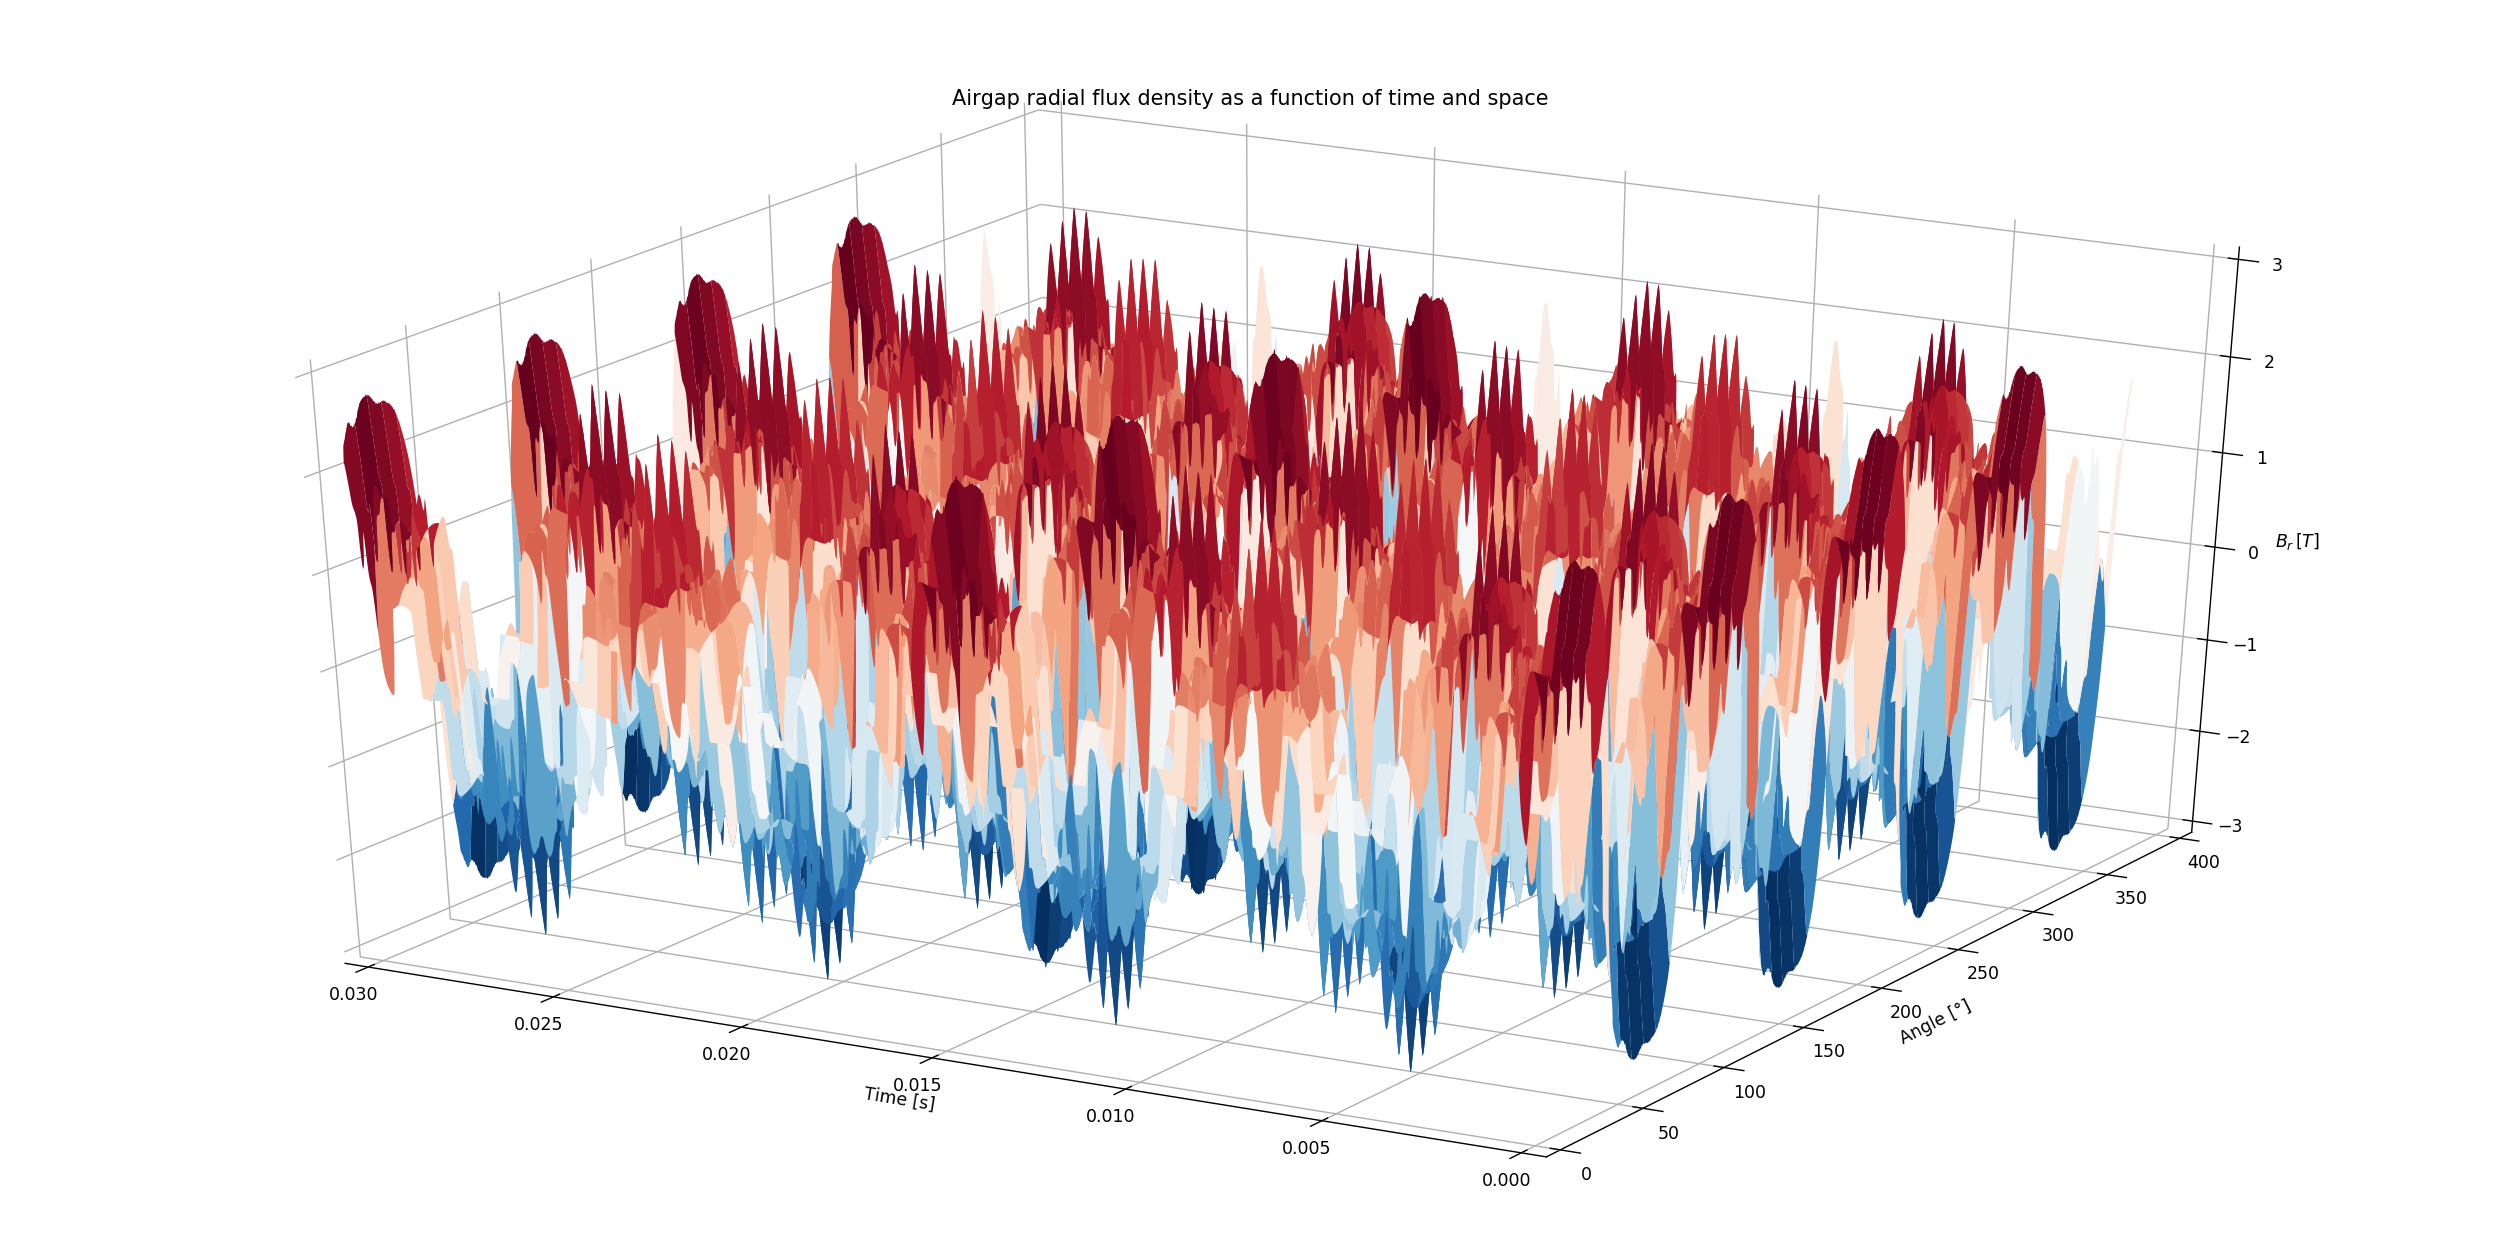

In [5]:
#------------------------------------------------------
# Plot the flux density as a surface over time and space
t_max = 0.03
z_max = 3.0
out.plot_A_surf("mag.Br", t_max=t_max, z_max=z_max)
#------------------------------------------------------

## `plot_A_time_space`

### Description

This plot command gives a multiplot of the field as a function of time, space, with time and space fft, and a contour plot in the time/space domain.

### Parameters

|Parameter|Description|Type|Default Value|
| :-: | :- | :-: | :-: |
|*Data_str*|Name of the field|`str`|mandatory|
|*is_deg*|Angle in degrees or radians|`bool`|`True`|
|*is_elecorder*|x-axis of the time fft in electrical orders|`bool`|`False`|
|*is_spaceorder*|x-axis of the space fft in space orders|`bool`|`False`|
|*freq_max*|Maximum value for the frequencies to display|`float`|`20000`|
|*r_max*|Maximum value for the wavenumbers to display|`int`|`100`|
|*mag_max*|Maximum value for the magnitude|`float`|`1.0`|
|*is_norm*|Normalize the field|`bool`|`False`|
|*unit*|Unit of the field|`str`|`"SI"`|
|*colormap*|Colormap|`cmp`|`"RdBu_r"`|

### Example

<IPython.core.display.Javascript object>


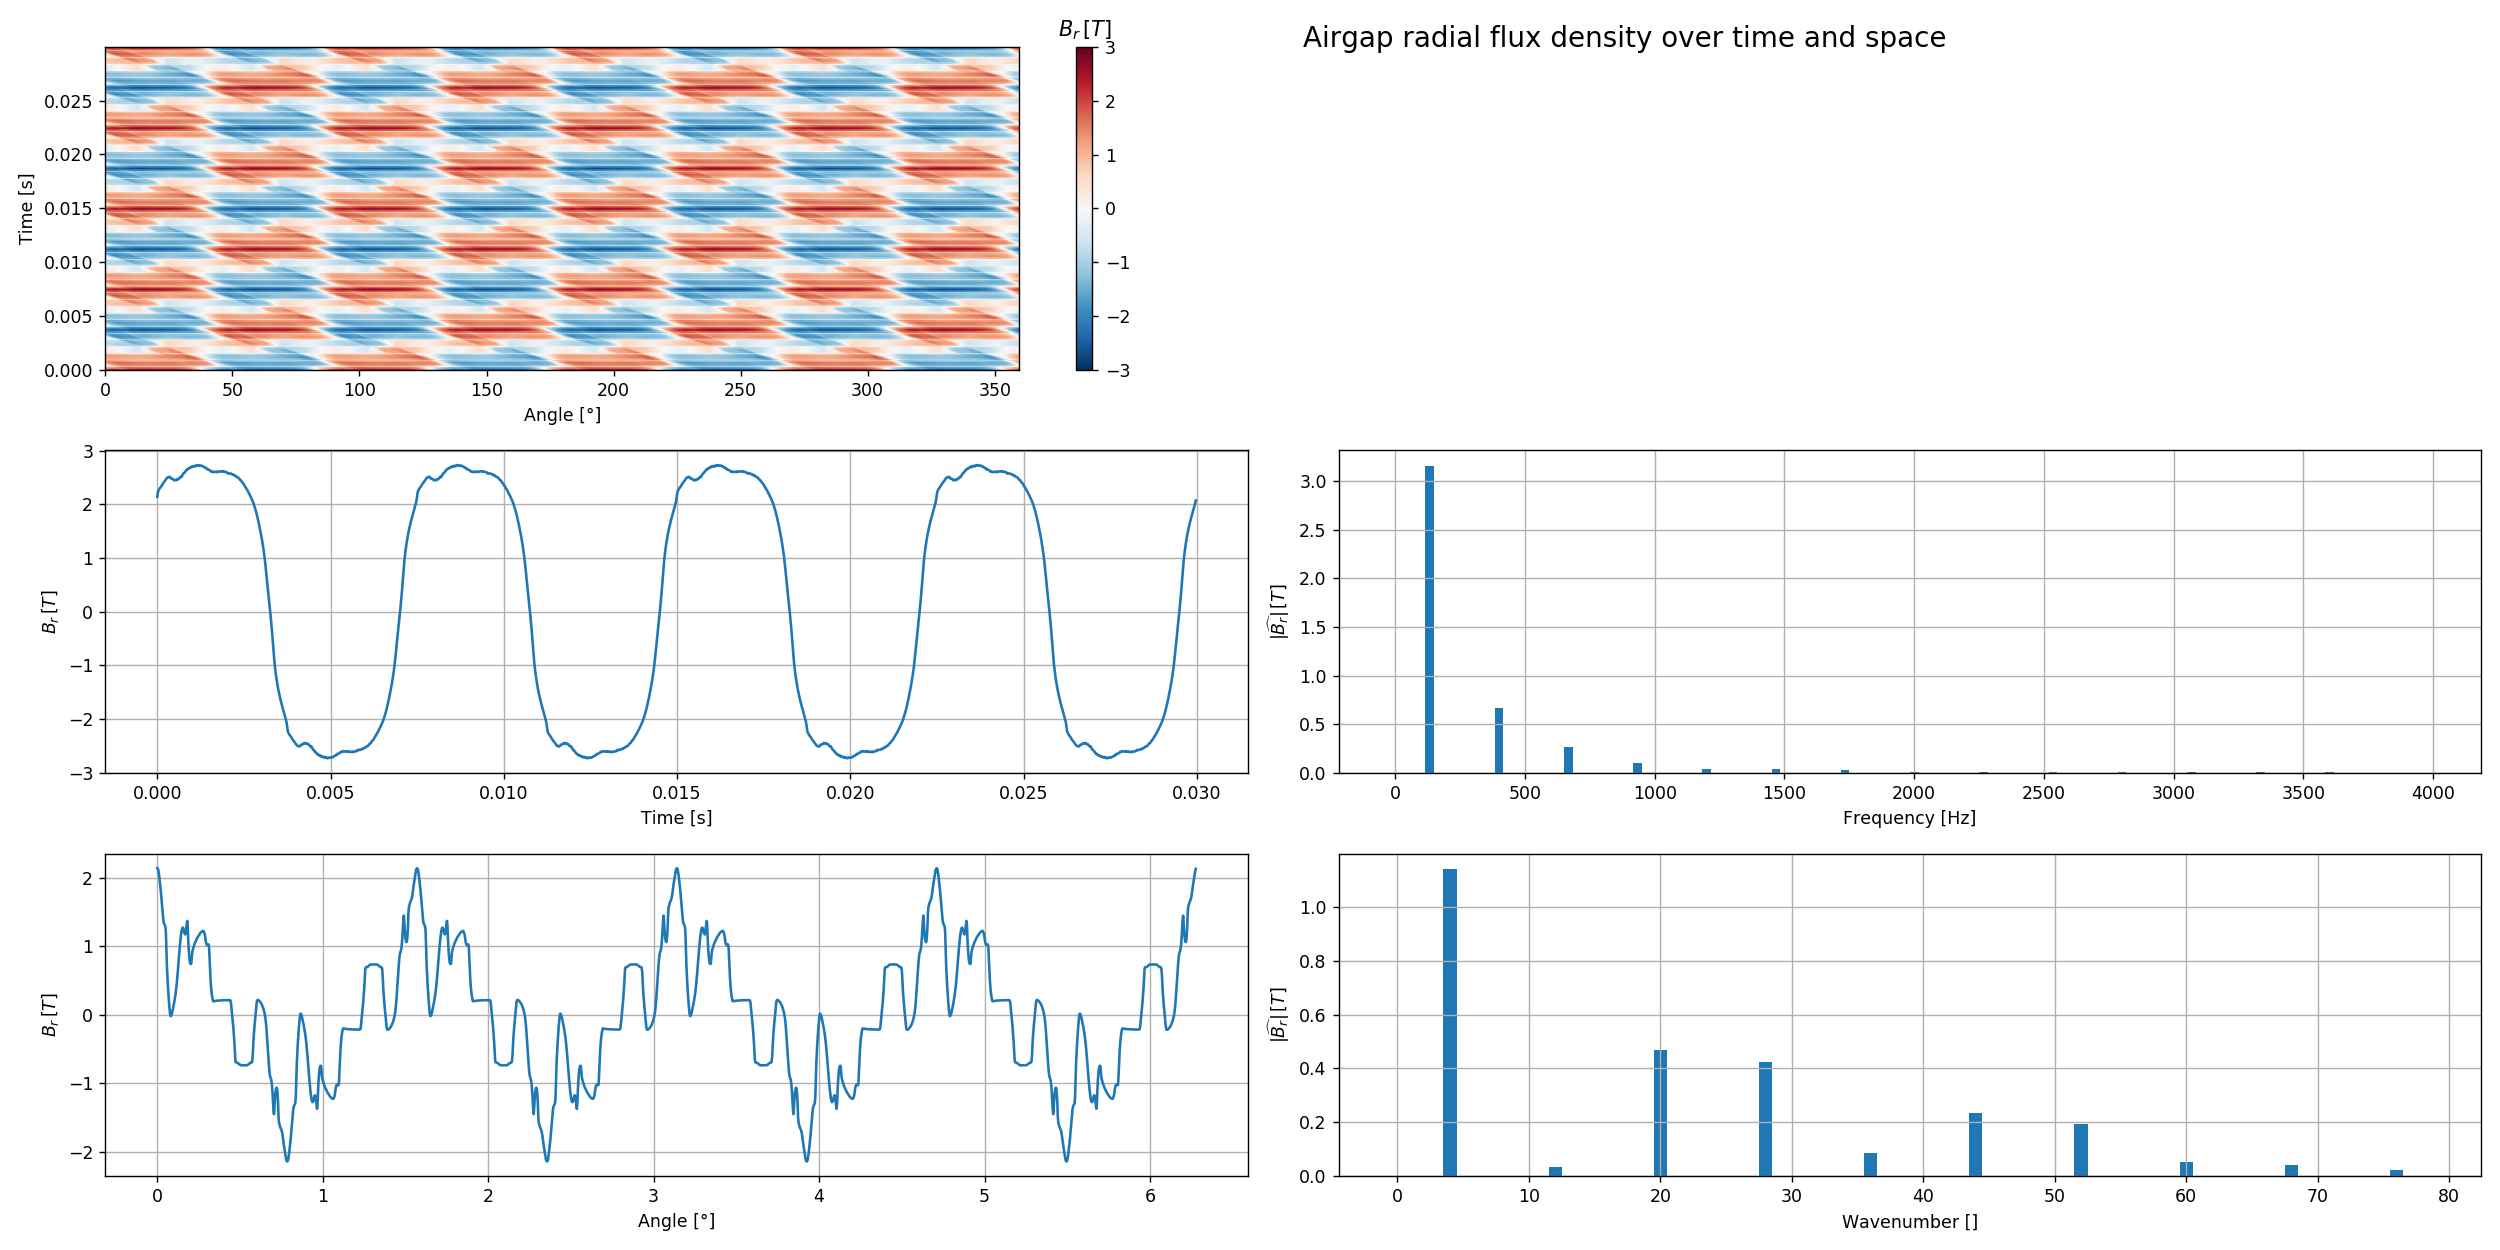

In [6]:
#------------------------------------------------------
# Plot the flux density as a function of time and space
out.plot_A_time_space("mag.Br", freq_max=freq_max, r_max=r_max, z_max=z_max)
#------------------------------------------------------

## `plot_A_cfft2`

### Description

This plot commands plots the FFT2D as a 3D stem plot.

### Parameters

|Parameter|Description|Type|Default Value|
| :-: | :- | :-: | :-: |
|*Data_str*|Name of the field|`str`|mandatory|
|*is_elecorder*|x-axis of the time fft in electrical orders|`bool`|`False`|
|*is_spaceorder*|x-axis of the space fft in space orders|`bool`|`False`|
|*freq_max*|Maximum value for the frequencies to display|`float`|`20000`|
|*r_max*|Maximum value for the wavenumbers to display|`int`|`100`|
|*mag_max*|Maximum value for the magnitude|`float`|`1.0`|
|*N_stem*|Number of harmonic stems to display|`int`|`100`|
|*disp_negative*|Plot negative frequencies|`bool`|`False`|
|*is_norm*|Normalize the field|`bool`|`False`|
|*unit*|Unit of the field|`str`|`"SI"`|

### Example

<IPython.core.display.Javascript object>


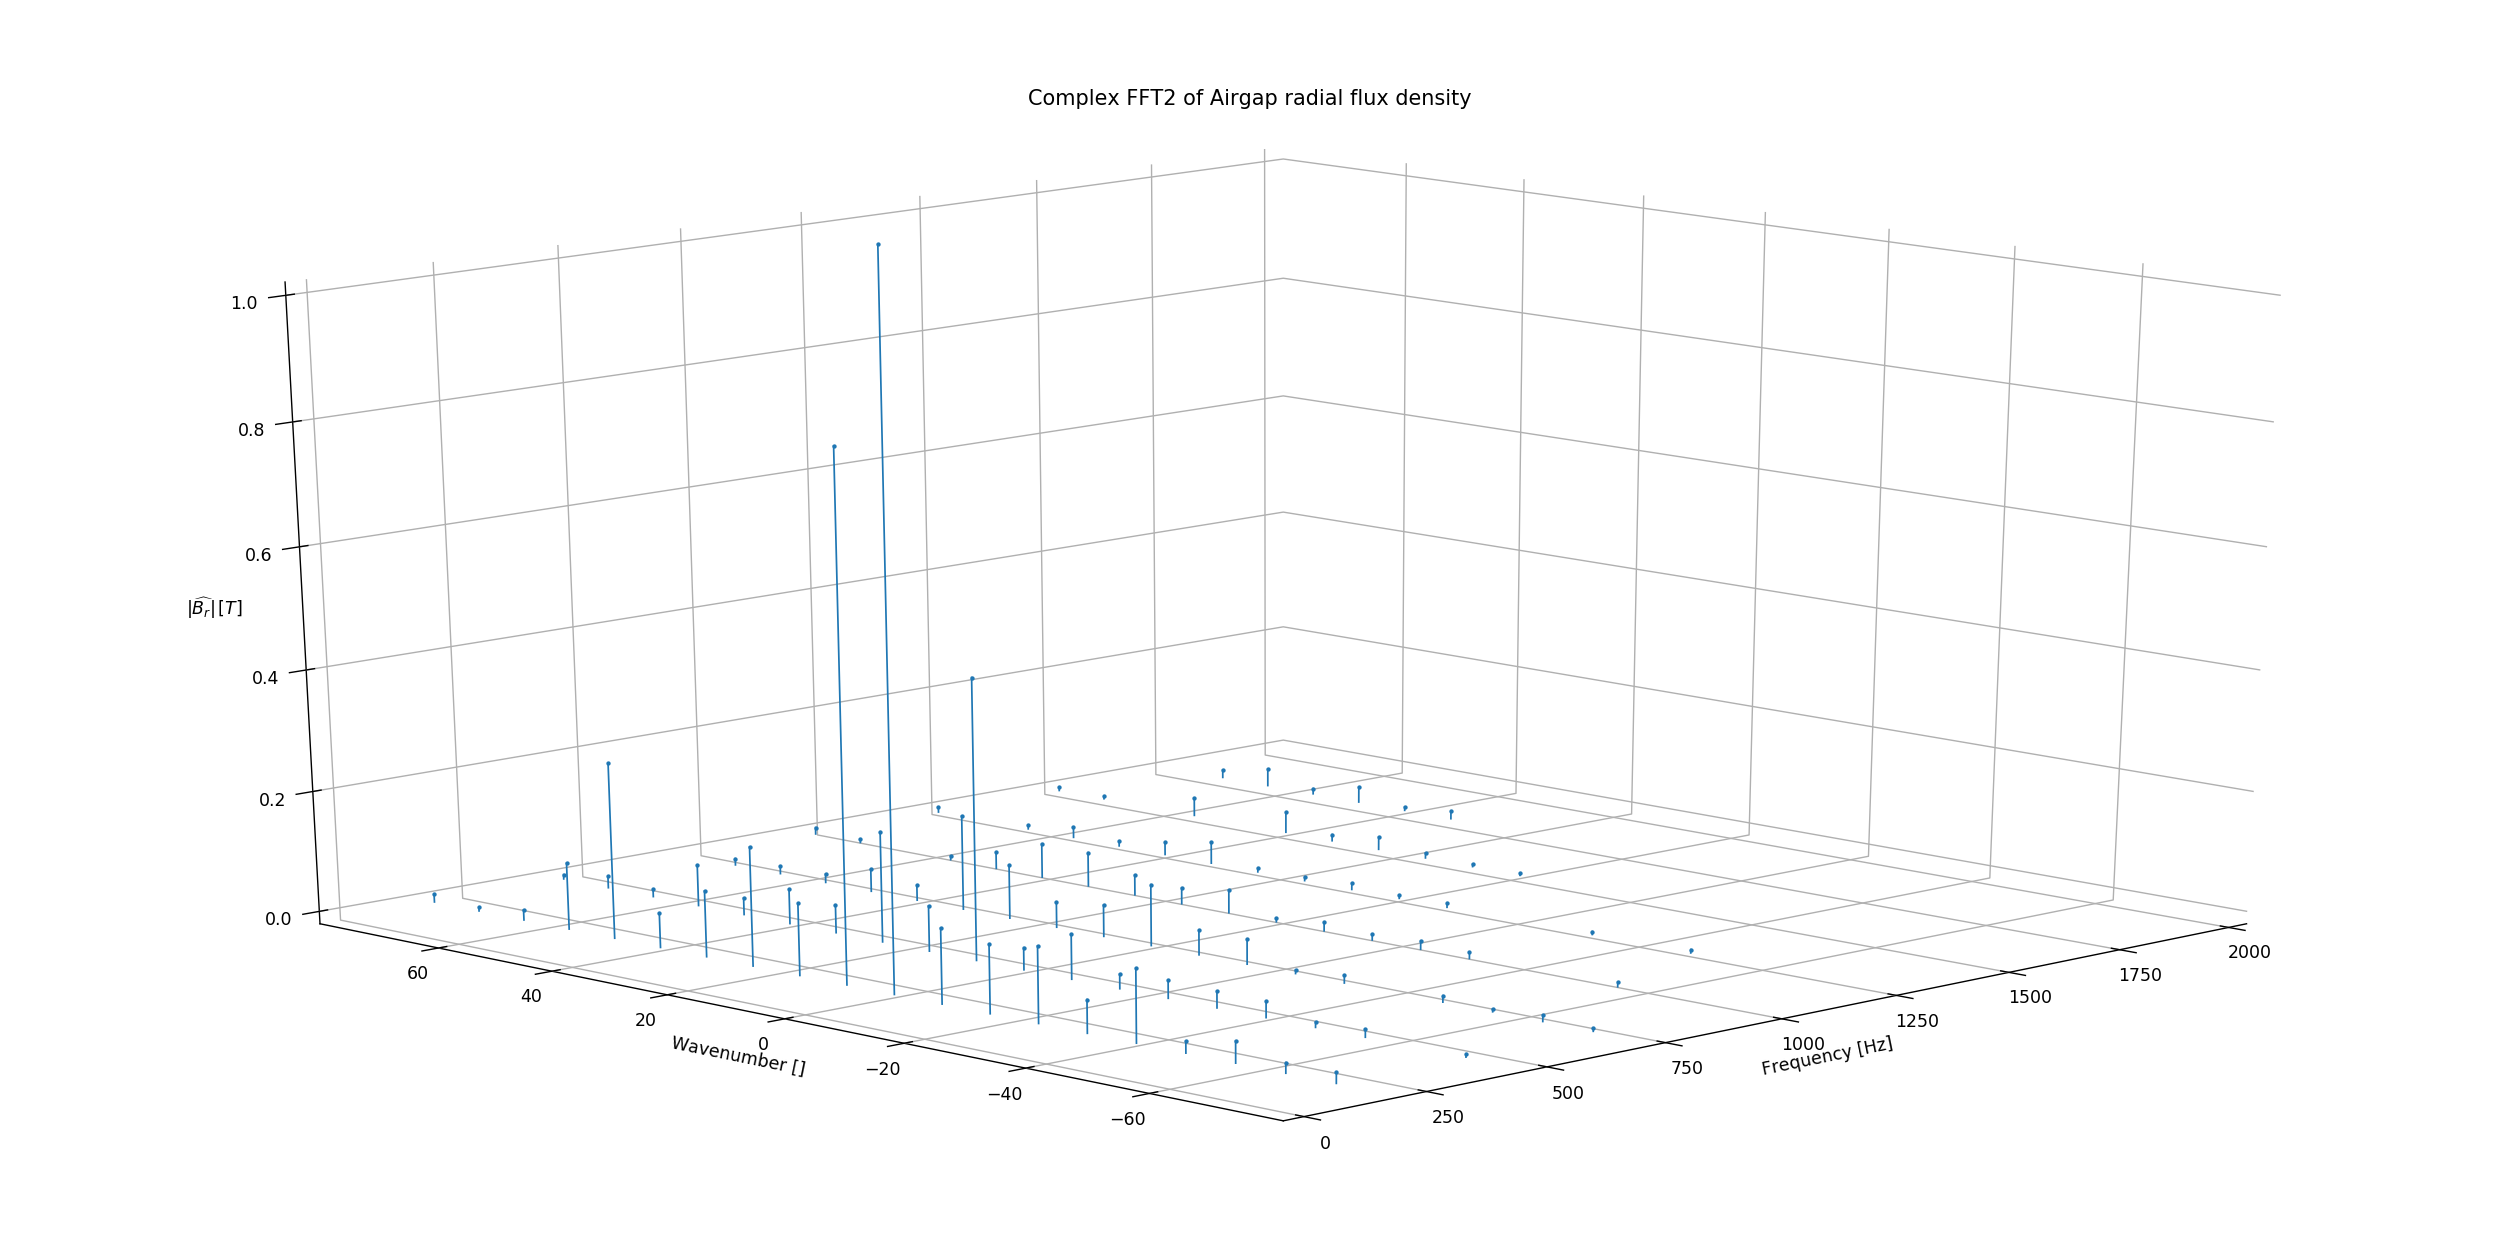

In [7]:
#------------------------------------------------------
# Plot the fft2 with stems
freq_max = 2000
out.plot_A_cfft2("mag.Br", freq_max=freq_max, r_max=r_max)
#------------------------------------------------------

## `plot_A_fft2`

### Description

This plot command plots the FFT2D as a pcolor figure.

### Parameters

|Parameter|Description|Type|Default Value|
| :-: | :- | :-: | :-: |
|*Data_str*|Name of the field|`str`|mandatory|
|*is_phase*|Add the phase as a subplot|`bool`|`False`|
|*is_deg*|Phase in degrees or radians|`bool`|`True`|
|*is_elecorder*|x-axis of the time fft in electrical orders|`bool`|`False`|
|*is_spaceorder*|x-axis of the space fft in space orders|`bool`|`False`|
|*freq_max*|Maximum value for the frequencies to display|`float`|`20000`|
|*r_max*|Maximum value for the wavenumbers to display|`int`|`100`|
|*mag_max*|Maximum value for the magnitude|`float`|`1.0`|
|*is_norm*|Normalize the field|`bool`|`False`|
|*unit*|Unit of the field|`str`|`"SI"`|
|*colormap*|Colormap|`cmp`|`"RdBu_r"`|

### Example

<IPython.core.display.Javascript object>


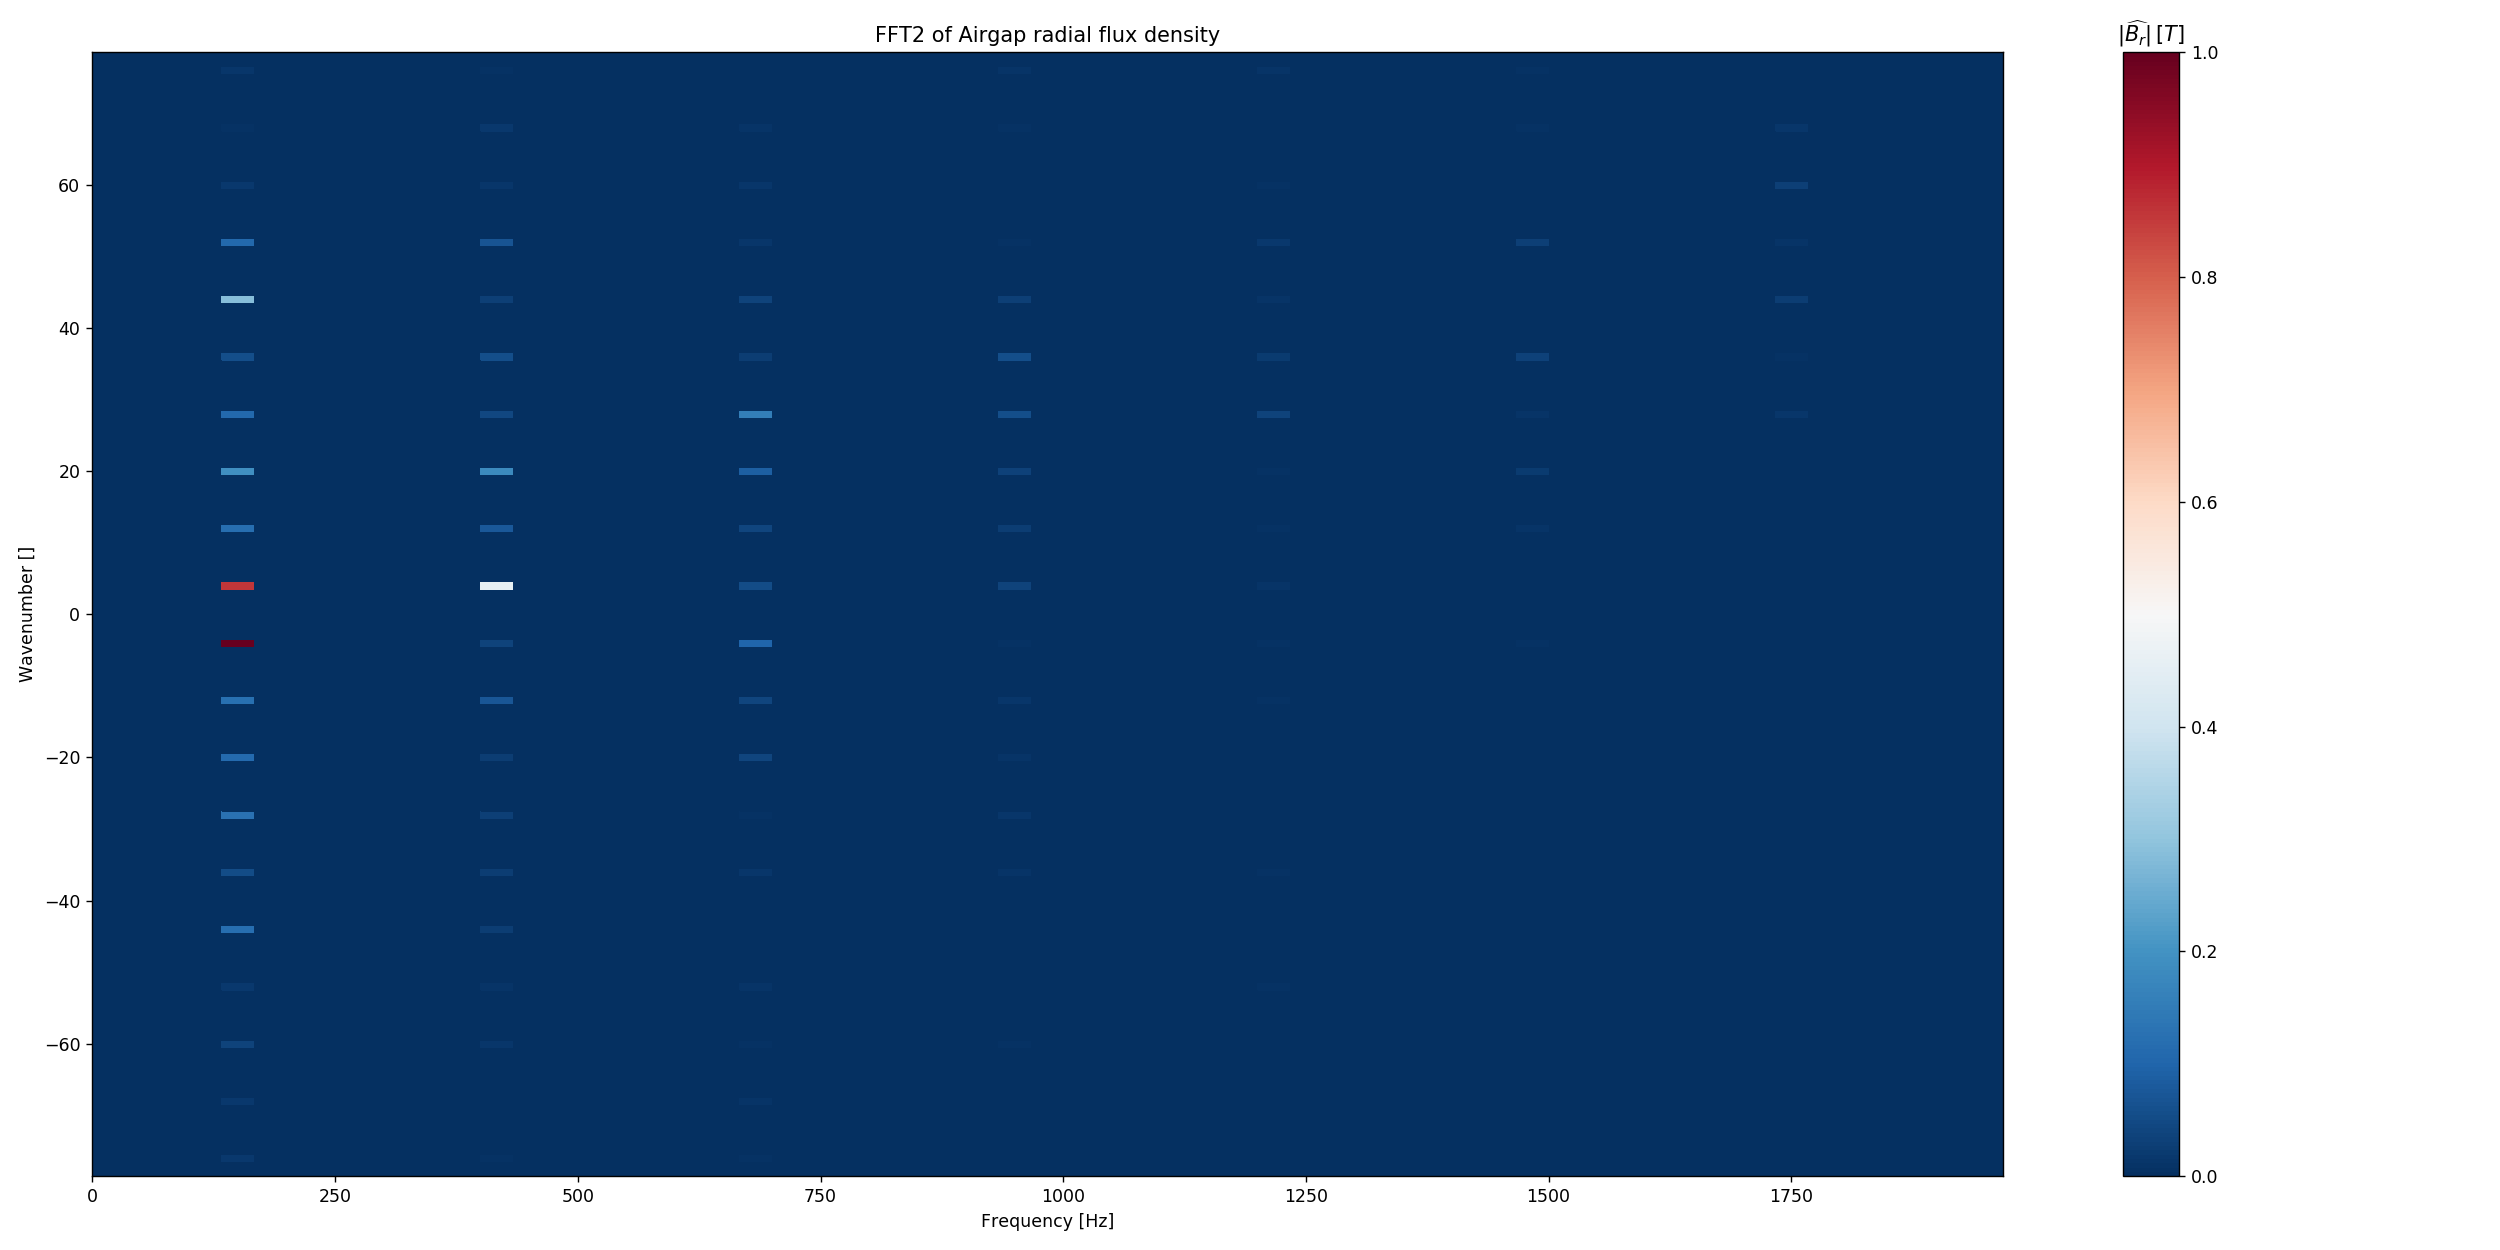

In [8]:
#------------------------------------------------------
# Plot the fft2 as a pcolor
out.plot_A_fft2("mag.Br", freq_max=freq_max, r_max=r_max)
#------------------------------------------------------